In [81]:
# 데이터 분석에 필요한 모듈 import
import numpy as np  
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from matplotlib import rc

# MacOS에서 한글깨짐 방지를 위한 설정
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

# seaborn 컬러팔레트 설정
sns.set_palette("pastel")

In [82]:
# dataset 불러오기 (csv파일)
df = pd.read_csv('./data.csv')
df.head()


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [83]:
# price 컬럼과 bedrooms 컬럼의 자료형 변경 (float -> int)
df[['price','bedrooms']] = df[['price','bedrooms']].astype(int)

# date 컬럼의 날짜 표기 타입 변경 (시,분,초 제거)
df['date'] = pd.to_datetime(df['date'])
df.head()


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02,313000,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02,2384000,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02,342000,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02,420000,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02,550000,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [84]:
# 사용하지 않을 컬럼들 드랍 후 d1이라는 새로운 데이터프레임 생성
d1 = df.drop(['sqft_above','sqft_basement','yr_built','yr_renovated','statezip'], axis=1).reset_index(drop=True)
d1

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,street,city,country
0,2014-05-02,313000,3,1.50,1340,7912,1.5,0,0,3,18810 Densmore Ave N,Shoreline,USA
1,2014-05-02,2384000,5,2.50,3650,9050,2.0,0,4,5,709 W Blaine St,Seattle,USA
2,2014-05-02,342000,3,2.00,1930,11947,1.0,0,0,4,26206-26214 143rd Ave SE,Kent,USA
3,2014-05-02,420000,3,2.25,2000,8030,1.0,0,0,4,857 170th Pl NE,Bellevue,USA
4,2014-05-02,550000,4,2.50,1940,10500,1.0,0,0,4,9105 170th Ave NE,Redmond,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09,308166,3,1.75,1510,6360,1.0,0,0,4,501 N 143rd St,Seattle,USA
4596,2014-07-09,534333,3,2.50,1460,7573,2.0,0,0,3,14855 SE 10th Pl,Bellevue,USA
4597,2014-07-09,416904,3,2.50,3010,7014,2.0,0,0,3,759 Ilwaco Pl NE,Renton,USA
4598,2014-07-10,203400,4,2.00,2090,6630,1.0,0,0,3,5148 S Creston St,Seattle,USA


In [85]:
# 데이터 개수와 컬럼종류, Null값 유무, 데이터 타입 등의 데이터프레임 정보 확인 
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         4600 non-null   datetime64[ns]
 1   price        4600 non-null   int64         
 2   bedrooms     4600 non-null   int64         
 3   bathrooms    4600 non-null   float64       
 4   sqft_living  4600 non-null   int64         
 5   sqft_lot     4600 non-null   int64         
 6   floors       4600 non-null   float64       
 7   waterfront   4600 non-null   int64         
 8   view         4600 non-null   int64         
 9   condition    4600 non-null   int64         
 10  street       4600 non-null   object        
 11  city         4600 non-null   object        
 12  country      4600 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(7), object(3)
memory usage: 467.3+ KB


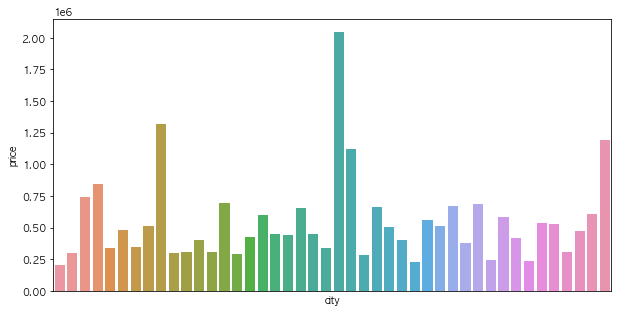

In [133]:
# city를 기준으로 그룹화하고 price 값들의 평균값으로 이루어진 데이터 프레임 생성
city_price = d1.groupby('city')['price'].mean().round(2).to_frame().reset_index()

# 그래프 사이즈 변경
plt.figure(figsize=(10,5))

# seaborn의 barplot()을 통한 막대그래프 그리기 - x축:도시, y축:평균집값
sns.barplot(x='city', y='price', data=city_price)

# x축 눈금선(?) 제거
plt.xticks([])
plt.show()

In [134]:
city_price = d1.groupby('city')['price'].mean().round(2).to_frame().reset_index()
# city_price 데이터프레임을 price 기준으로 내림차순 정렬 후 인덱스 초기화
city_price = city_price.sort_values(by='price', ascending=False).reset_index(drop=True)

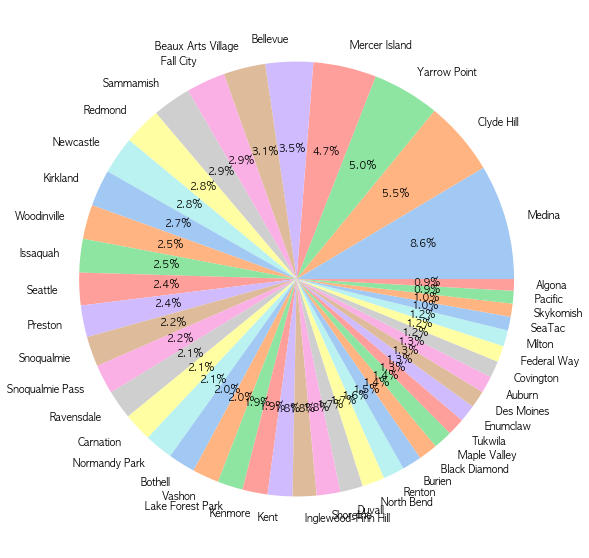

In [135]:
plt.figure(figsize=(20,10))
# matplotlib의 pie()를 통한 원형그래프 - autopct:퍼센트표사, labels:도시이름, city_price 데이터프레임의 price를 비율 반영
plt.pie(city_price['price'], autopct='%.1f%%', labels=city_price['city'])
plt.show()

In [136]:
# d1 데이터프레임에 rooms라는 컬럼 추가 - 침실과 화장실 개수 합친 값
d1['rooms'] = d1['bedrooms'] + d1['bathrooms']

In [138]:
# d1 데이터프레임 rooms 컬럼의 수치 계산 정보
d1['rooms'].describe()

count    4600.000000
mean        5.561685
std         1.489321
min         0.000000
25%         4.750000
50%         5.500000
75%         6.500000
max        15.000000
Name: rooms, dtype: float64

In [89]:
# d1의 rooms 컬럼을 기준으로 그룹화 후, price의 평균값으로 이루어진 데이터프레임 생성
rooms_price = d1.groupby('rooms')['price'].mean().round(2).to_frame().reset_index()
rooms_price

,rooms,price
0,0.00,1195324.00
1,1.75,271568.75
2,2.00,255123.91
3,2.25,516500.00
4,2.50,310000.00
5,2.75,360900.12
6,3.00,336588.78
7,3.25,441650.00
8,3.50,375629.66
9,3.75,443302.47


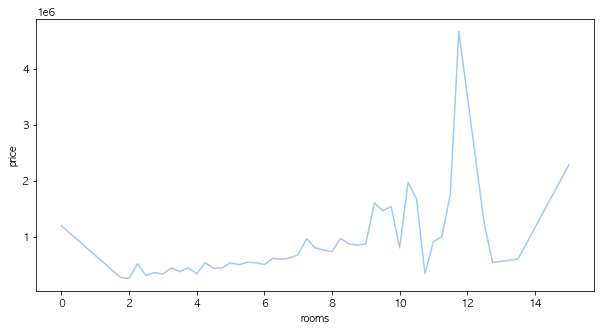

In [91]:
plt.figure(figsize=(10,5))
# seaborn의 lineplot()을 통한 선그래프 - x축:방개수, y축:집값
sns.lineplot(x='rooms', y='price', data=rooms_price)
plt.show()

In [139]:
# d1 데이터프레임의 view 컬럼의 수치 계산 정보
d1.view.describe()

count    4600.000000
mean        0.240652
std         0.778405
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         4.000000
Name: view, dtype: float64

In [93]:
# d1 데이터프레임의 condition 컬럼의 수치 계산 정보
d1.condition.describe()

count    4600.000000
mean        3.451739
std         0.677230
min         1.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: condition, dtype: float64

In [94]:
# 피벗테이블을 이용한 그룹화 - index:condition->view, 수치:집값
cv_price = pd.pivot_table(d1, index=['condition','view'], values='price')

# 가격 평균값의 소수점 셋째자리에서 반올림하여 둘째자리까지 표시
cv_price['price'] = cv_price['price'].round(2)
cv_price

price
condition view            
1         0      306633.33
2         0      252418.06
          2     2555000.00
3         0      515167.90
          1      945275.21
          2      752796.75
          3     1041768.34
          4     1155747.14
4         0      490426.30
          1      686566.04
          2      855600.29
          3      931698.57
          4     1096448.57
5         0      564761.01
          1     1175728.12
          2      884436.67
          3      949413.46
          4     1419292.79

In [95]:
# 피벗테이블을 이용한 그룹화 - index:view->condition, 수치:집값
vc_price = pd.pivot_table(d1, index=['view','condition'], values='price')
vc_price['price'] = vc_price['price'].round(2)
vc_price

price
view condition            
0    1           306633.33
     2           252418.06
     3           515167.90
     4           490426.30
     5           564761.01
1    3           945275.21
     4           686566.04
     5          1175728.12
2    2          2555000.00
     3           752796.75
     4           855600.29
     5           884436.67
3    3          1041768.34
     4           931698.57
     5           949413.46
4    3          1155747.14
     4          1096448.57
     5          1419292.79

   view       price
0     0   510684.89
1     1   867010.96
2     2   808935.28
3     3   998207.52
4     4  1190666.70


<AxesSubplot:xlabel='view', ylabel='price'>

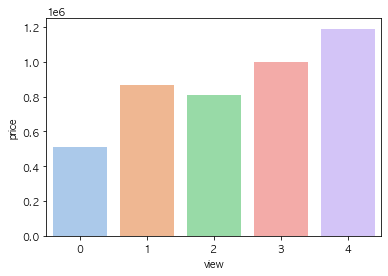

In [140]:
# d1의 view컬럼을 기준으로 그룹화하여 price의 평균값으로 이루어진 새로운 데이터프레임 생성
view_price = d1.groupby('view')['price'].mean().round(2).to_frame().reset_index()
print(view_price)

# seaborn의 barplot()을 이용한 막대그래프 - x축:view점수, y축:집값
sns.barplot(x='view',y='price',data=view_price)

   condition      price
0          1  306633.33
1          2  324373.75
2          3  550111.50
3          4  533647.27
4          5  637041.31


<AxesSubplot:xlabel='condition', ylabel='price'>

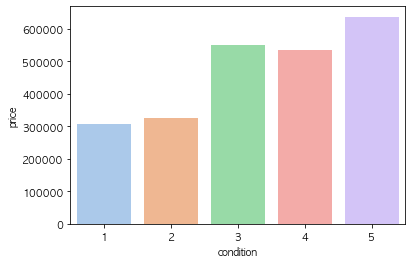

In [97]:
# d1의 condition컬럼을 기준으로 그룹화하여 price의 평균값으로 이루어진 새로운 데이터프레임 생성
condition_price = d1.groupby('condition')['price'].mean().round(2).to_frame().reset_index()
print(condition_price)

# seaborn의 barplot()을 이용한 막대그래프 - x축:condition점수, y축:집값
sns.barplot(x='condition',y='price',data=condition_price)

In [98]:
# d1의 sqft_living 컬럼의 수치 계산 정보 - 집 넓이
d1['sqft_living'].describe(적적

count     4600.000000
mean      2139.346957
std        963.206916
min        370.000000
25%       1460.000000
50%       1980.000000
75%       2620.000000
max      13540.000000
Name: sqft_living, dtype: float64

In [99]:
# d1의 sqft_lot 컬럼의 수치 계산 정보 - 땅 면적
d1['sqft_lot'].describe().round(2)수

count       4600.00
mean       14852.52
std        35884.44
min          638.00
25%         5000.75
50%         7683.00
75%        11001.25
max      1074218.00
Name: sqft_lot, dtype: float64

In [100]:
# 집 넓이에 따른 범주 설정 함수
def living_g(x):
    if x < 500:
        return '0000-0500'
    elif 500 <= x and x < 1000:
        return '0500-1000'
    elif 1000 <= x and x < 1500:
        return '1000-1500'
    elif 1500 <= x and x < 2000:
        return '1500-2000'
    elif 2000 <= x and x < 2500:
        return '2000-2500'
    elif 2500 <= x and x < 3000:
        return '2500-3000'
    elif 3000 <= x and x < 3500:
        return '3000-3500'
    elif 3500 <= x and x < 4000:
        return '3500-4000'
    elif 4000 <= x and x < 4500:
        return '4000-4500'
    else:
        return '4500-xxxx'

# 땅 면적에 따른 범주 설정 함수
def lot_g(x):
    if x < 1500:
        return '00000-01500'
    elif 1500 <= x and x < 3000:
        return '01500-03000'
    elif 3000 <= x and x < 4500:
        return '03000-04500'
    elif 4500 <= x and x < 6000:
        return '04500-06000'
    elif 6000 <= x and x < 7500:
        return '06000-07500'
    elif 7500 <= x and x < 9000:
        return '07500-09000'
    elif 9000 <= x and x < 10500:
        return '09000-10500'
    elif 10500 <= x and x < 12000:
        return '10500-12000'
    elif 12000 <= x and x < 13500:
        return '12000-13500'
    else:
        return '13500-xxxxx'

In [101]:
# d1의 sqft_living 컬럼의 데이터에 living_g 함수를 적용시키고 d1의 living_g라는 새로운 컬럼 추가
d1['living_g'] = d1['sqft_living'].apply(living_g)

# d1의 sqft_lot 컬럼의 데이터에 lot_g 함수를 적용시키고 d1의 lot_g라는 새로운 컬럼 추가
d1['lot_g'] = d1['sqft_lot'].apply(lot_g)
d1

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,street,city,country,rooms,living_g,lot_g
0,2014-05-02,313000,3,1.50,1340,7912,1.5,0,0,3,18810 Densmore Ave N,Shoreline,USA,4.50,1000-1500,07500-09000
1,2014-05-02,2384000,5,2.50,3650,9050,2.0,0,4,5,709 W Blaine St,Seattle,USA,7.50,3500-4000,09000-10500
2,2014-05-02,342000,3,2.00,1930,11947,1.0,0,0,4,26206-26214 143rd Ave SE,Kent,USA,5.00,1500-2000,10500-12000
3,2014-05-02,420000,3,2.25,2000,8030,1.0,0,0,4,857 170th Pl NE,Bellevue,USA,5.25,2000-2500,07500-09000
4,2014-05-02,550000,4,2.50,1940,10500,1.0,0,0,4,9105 170th Ave NE,Redmond,USA,6.50,1500-2000,10500-12000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09,308166,3,1.75,1510,6360,1.0,0,0,4,501 N 143rd St,Seattle,USA,4.75,1500-2000,06000-07500
4596,2014-07-09,534333,3,2.50,1460,7573,2.0,0,0,3,14855 SE 10th Pl,Bellevue,USA,5.50,1000-1500,07500-09000
4597,2014-07-09,416904,3,2.50,3010,7014,2.0,0,0,3,759 Ilwaco Pl NE,Renton,USA,5.50,3000-3500,06000-07500
4598,2014-07-10,203400,4,2.00,2090,6630,1.0,0,0,3,5148 S Creston St,Seattle,USA,6.00,2000-2500,06000-07500


In [102]:
# d1의 living_g 컬럼을 기준으로 그룹화 후 price의 평균값으로 이루어진 데이터프레임 생성
living_d = d1.groupby('living_g')['price'].mean().round(2).to_frame().reset_index()
living_d

,living_g,price
0,0000-0500,206200.00
1,0500-1000,293474.05
2,1000-1500,385335.10
3,1500-2000,428980.22
4,2000-2500,543592.67
5,2500-3000,647752.57
6,3000-3500,800641.88
7,3500-4000,932131.22
8,4000-4500,1165101.32
9,4500-xxxx,1578783.77


In [103]:
# d1의 lot_g 컬럼을 기준으로 그룹화 후 price의 평균값으로 이루어진 데이터프레임 생성
lot_d = d1.groupby('lot_g')['price'].mean().round(2).to_frame().reset_index()
lot_d

,lot_g,price
0,00000-01500,430695.80
1,01500-03000,473147.93
2,03000-04500,562663.00
3,04500-06000,552897.23
4,06000-07500,477454.36
5,07500-09000,492737.91
6,09000-10500,521412.91
7,10500-12000,614017.66
8,12000-13500,674619.82
9,13500-xxxxx,676372.06


<AxesSubplot:xlabel='living_g', ylabel='price'>

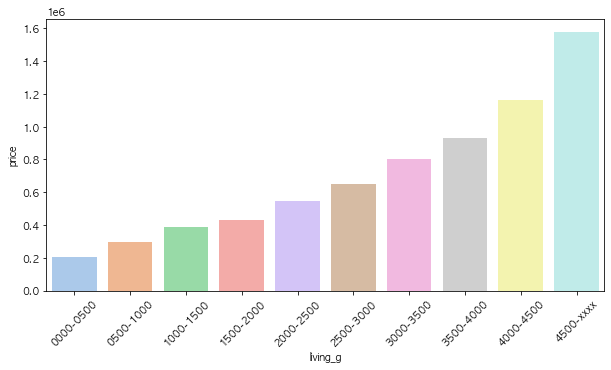

In [104]:
plt.figure(figsize=(10,5))

# x축 눈금선에 해당하는 문자열 각도를 45도 회전
plt.xticks(rotation=45)

# seaborn의 barplot()을 이용한 막대그래프 - x축:집넓이, y축:집값
sns.barplot(x='living_g',y='price',data=living_d)

<AxesSubplot:xlabel='lot_g', ylabel='price'>

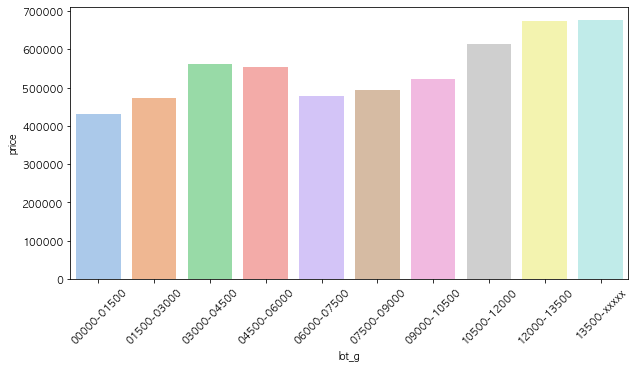

In [105]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=45)

# seaborn의 barplot()을 이용한 막대그래프 - x축:땅면적, y축:집값
sns.barplot(x='lot_g',y='price',data=lot_d)

In [106]:
# d1의 sqft_living 컬럼을 기준으로 그룹화 후 price의 평균값으로 이루어진 데이터프레임 생성
living_price = d1.groupby('sqft_living')['price'].mean().to_frame().reset_index()
living_price.describe().round(2)

,sqft_living,price
count,566.00,566.00
mean,2864.63,750042.44
std,1601.00,627037.31
min,370.00,0.00
25%,1642.50,379743.04
50%,2645.00,585317.70
75%,3817.50,879592.34
max,13540.00,7062500.00


In [107]:
# d1의 sqft_lot 컬럼을 기준으로 그룹화 후 price의 평균값으로 이루어진 데이터프레임 생성
lot_price = d1.groupby('sqft_lot')['price'].mean().to_frame().reset_index()
lot_price.describe().round(2)

,sqft_lot,price
count,3113.00,3113.00
mean,17681.22,568992.38
std,41386.21,641318.70
min,638.00,0.00
25%,5340.00,340000.00
50%,8395.00,476000.00
75%,13418.00,660000.00
max,1074218.00,26590000.00


<Figure size 720x360 with 0 Axes>

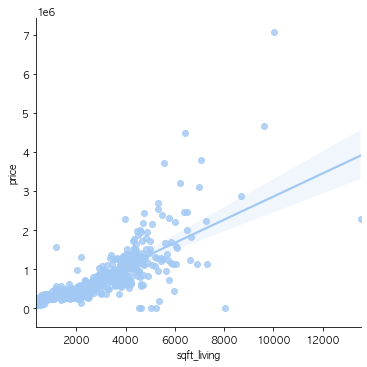

In [113]:
plt.figure(figsize=(10,5))

# seaborn의 lmplot()을 이용하여 산점도+선그래프 - x축:집넓이, y축:집값
sns.lmplot(x='sqft_living', y='price', data=living_price)

<Figure size 720x360 with 0 Axes>

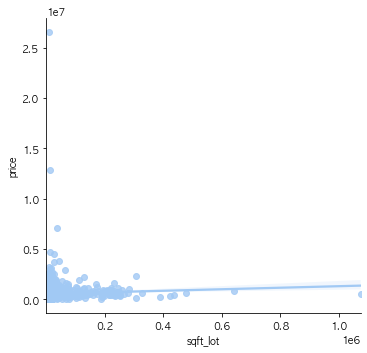

In [109]:
plt.figure(figsize=(10,5))

# seaborn의 lmplot()을 이용하여 산점도+선그래프 - x축:땅면적, y축:집값
sns.lmplot(x='sqft_lot', y='price', data=lot_price)